In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/ushape.csv")

In [ ]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


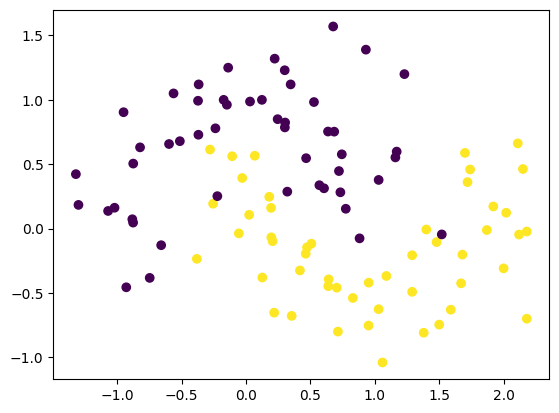

In [ ]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(10,activation = 'tanh', input_dim = 2))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(1,activation = 'sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights

[array([[ 0.2708127 ,  0.35141367,  0.5379017 , -0.17810935,  0.6033407 ,
          0.12852967,  0.50375766, -0.10721368, -0.03322029, -0.25738862],
        [ 0.20485258,  0.00372863,  0.10114235, -0.39443716, -0.38425434,
         -0.6283672 , -0.252261  ,  0.01391369, -0.13176417, -0.05145168]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.22567314,  0.1103    ,  0.16010702,  0.05587137, -0.04998383,
         -0.36728024,  0.41764474,  0.45394814, -0.20340803, -0.14991322],
        [ 0.09060246, -0.09344196,  0.39084017, -0.14693257,  0.1739763 ,
         -0.5229303 , -0.03454047, -0.42228115, -0.28764725,  0.15728813],
        [-0.4722916 ,  0.36342353, -0.06985816,  0.38172168,  0.0006882 ,
          0.54389274, -0.05348501, -0.36798662,  0.1508823 , -0.21318838],
        [ 0.52404344, -0.39383608, -0.48557636, -0.26767147, -0.2700022 ,
         -0.09910959, -0.3281425 , -0.19030386, -0.22590706, -0.09458381],
        [ 0.35754

In [ ]:
initial_weights[0] = np.random.randn(2,10) * np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1) * np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)


In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[-0.80934566,  0.2338533 ,  0.02326138,  1.7042677 ,  0.7321973 ,
          0.27068466,  0.09583231, -0.7767815 ,  1.4937857 ,  0.40862027],
        [-0.7083187 , -0.68020284, -0.38803333, -1.6082261 , -0.47088724,
          2.106367  , -1.5535545 ,  0.01602817,  0.9091611 , -0.41385853]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-1.8806939e-01,  3.3320987e-01, -2.0062196e-01, -9.9416368e-02,
          4.9125746e-01,  3.6916837e-01, -4.1651034e-01,  3.0983129e-01,
         -4.1767344e-01, -2.0009984e-01],
        [ 5.4806733e-01,  4.1498402e-01, -8.0903471e-02,  9.0696625e-02,
         -1.2292992e-01,  5.4333769e-02,  2.6409057e-01,  3.2935984e-02,
         -3.8157365e-01,  1.4666633e-01],
        [ 4.4237137e-01, -4.9805978e-01,  7.3773104e-01, -5.4310590e-01,
          1.1248811e-01,  1.2249897e-01, -4.6858364e-01, -1.8190266e-01,
         -1.4492583e-01, -5.4313791e-01],
        [ 9.3888372e-02,  2.5773370e-01, -2.17165

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = "adam", metrics=['accuracy'])

In [ ]:
history = model.fit(X,y, epochs = 100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.4805 - loss: 0.7219 - val_accuracy: 0.6500 - val_loss: 0.6579
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5227 - loss: 0.7005 - val_accuracy: 0.7000 - val_loss: 0.6379
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5484 - loss: 0.6777 - val_accuracy: 0.7500 - val_loss: 0.6186
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5750 - loss: 0.6652 - val_accuracy: 0.7500 - val_loss: 0.6004
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6328 - loss: 0.6453 - val_accuracy: 0.8000 - val_loss: 0.5831
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6234 - loss: 0.6319 - val_accuracy: 0.8000 - val_loss: 0.5669
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7156 - loss: 0.6131 - val_accuracy: 0.8500 - val_loss: 0.5512
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7625 - loss: 0.6039 - val_accuracy: 0.9000 - val_loss

In [ ]:
model.get_weights()

[array([[-0.92835355,  0.08216334,  0.15647198,  1.8525071 ,  0.5824198 ,
          0.23178166,  0.23964664, -0.8086836 ,  1.5169125 ,  0.46264136],
        [-0.67761856, -0.64681023, -0.4331245 , -1.5526124 , -0.60515344,
          2.2162185 , -1.5589713 ,  0.10837267,  0.9112706 , -0.5067879 ]],
       dtype=float32),
 array([ 0.06629978,  0.10260022,  0.06330618, -0.045073  , -0.0638214 ,
        -0.08559547,  0.04700009, -0.16666353,  0.2459829 , -0.04626754],
       dtype=float32),
 array([[-2.46852577e-01,  3.72464597e-01, -1.49975479e-01,
          5.92512824e-02,  3.69505584e-01,  2.60493368e-01,
         -4.89980191e-01,  3.50626796e-01, -5.19056439e-01,
         -2.57447422e-01],
        [ 4.63333279e-01,  4.91937280e-01, -5.52552706e-03,
          1.84594944e-01, -2.21389592e-01, -7.34766275e-02,
          2.86482424e-01, -3.59747298e-02, -4.71818328e-01,
          5.69410920e-02],
        [ 3.42028737e-01, -3.87347132e-01,  8.25405002e-01,
         -4.38625455e-01,  1.08105

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

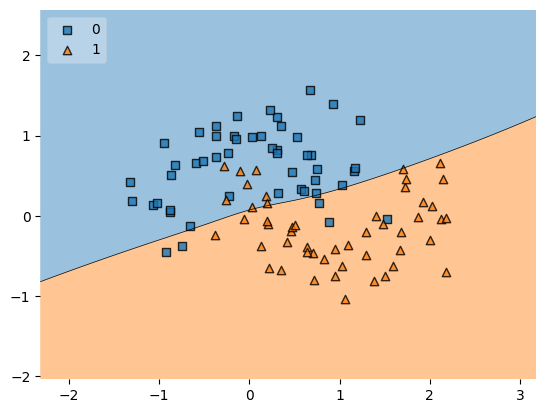

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)